### Abtract

Around the planet there are more than 2,500 artificial satellites, and there are different functions they can perform. This project is focused on solving a common problem with reconnaissance satellites, classifying binary satellite images to detect images that have clouds. To solve this problem we will develop and train a Convolutional Neural Network with Keras, to train and score this CNN we used a dataset from G. Cheng, J.Han, X. Lu Northwestern Polytechnical University.

# Data Base

To train this CNN I have used a database with more than 31,500 images from 45 classes and have variety to wether, location and distance. 
<img src="ISatelitales/golf_course/golf_course_013.jpg" width=200 height=200>
<img src="ISatelitales/cloud/cloud_018.jpg" width=200 height=200> 
<img src="ISatelitales/ship/ship_011.jpg" width=200 height=200>

Publication of the database:  G. Cheng, J. Han, X. Lu. Remote Sensing Image Scene Classification: Benchmark and State of the Art. Proceedings of the IEEE.

### CODE

In [9]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
import pandas as pd

### 1. Import images



In [10]:
dirname = os.path.join(os.getcwd(), 'ISatelitales')
imgpath = dirname + os.sep # os.sep es = \

imag = [] #list with images con las imágenes
IDcat = []; 
IDim = []; idim = 0



for ruta, carpetas, filenames in os.walk(imgpath): # path, folder and file names:

    print(ruta,idim)
    for filename in filenames: # looking at all files individually
            
        if ruta == imgpath +'cloud':  # if the image is in the cloud folder
            IDim.append(idim) ; idim += 1
            IDcat.append(1) # if the image have clouds IDcat value is 1
            filepath = os.path.join(ruta, filename) #obtain the image direction 
            imagen = plt.imread(filepath) #obtain the image array.
            imag.append(imagen) #save the image in images list
        else: 
            IDim.append(idim) ; idim += 1
            IDcat.append(0) # if the image have clouds IDcat value is 0
            filepath = os.path.join(ruta, filename) #obtain the image direction 
            imagen = plt.imread(filepath) #obtain the image array.
            imag.append(imagen) #save the image in images list
print('Total images: ',idim)
print('Cloud images: ',sum(IDcat))

C:\Users\jandr\Documents\GitHub\Cloud-detection-in-satellite-images-using-Neuronal-Networks\ISatelitales\ 0
C:\Users\jandr\Documents\GitHub\Cloud-detection-in-satellite-images-using-Neuronal-Networks\ISatelitales\airplane 0
C:\Users\jandr\Documents\GitHub\Cloud-detection-in-satellite-images-using-Neuronal-Networks\ISatelitales\airport 700
C:\Users\jandr\Documents\GitHub\Cloud-detection-in-satellite-images-using-Neuronal-Networks\ISatelitales\baseball_diamond 1400
C:\Users\jandr\Documents\GitHub\Cloud-detection-in-satellite-images-using-Neuronal-Networks\ISatelitales\basketball_court 2100
C:\Users\jandr\Documents\GitHub\Cloud-detection-in-satellite-images-using-Neuronal-Networks\ISatelitales\beach 2800
C:\Users\jandr\Documents\GitHub\Cloud-detection-in-satellite-images-using-Neuronal-Networks\ISatelitales\bridge 3500
C:\Users\jandr\Documents\GitHub\Cloud-detection-in-satellite-images-using-Neuronal-Networks\ISatelitales\chaparral 4200
C:\Users\jandr\Documents\GitHub\Cloud-detection-in-s

In [104]:
cat=IDcat
imagenes=imag

### 2. Division of the set into subsets training, validation and testing
It is necessary to separate the dataset into 3 groups:
* Train: will be used to train the CNN, it is the largest subset, it is 49% of the total images.
* Test: Used to calculate the error when the CNN is being trained, it is 21% of the total images.
* Validation: Used to validate the test score after training the CNN with a new data set, it is 30% of the total images.

This dataset has 31500 images, but only 700 have clouds, 2.2%. We have an imbalanced dataset, training a CNN with this ratio is a mistake. For this reason it is necessary to modify the ratio in the trining, test and validation dataset. After many tests, the best ratios are:
25% of images with clouds and 75% of images without clouds.

* Train: 30% of images with clouds.
* Test: 50% of images with clouds.
* Validation: 25% of images with clouds.



Cloud-free images filtering function

In [105]:
def filter_proportion(dat_set_cat, dat_set_im, rat_acept):
    Cat = [] 
    Im = []
    con1= 0 #counter Cloud-free images
    con2= 0 #counter cloud images
    lim = len(dat_set_cat)
    for i in range(lim) :
        if dat_set_cat[i] == 0:
            R=random.random()
            if R < rat_acept:
                con1 += 1
                Im.append(dat_set_im[i])
                Cat.append(dat_set_cat[i])

        elif dat_set_cat[i] == 1:
            con2 += 1
            Im.append(dat_set_im[i])
            Cat.append(dat_set_cat[i])


    Cat = np.array(Cat)
    Im = np.array(Im, dtype=np.uint8)
    print ('Ratio cloud images: ',con2/(con1+con2), '%')
    del dat_set_im; del dat_set_cat
    
    return Im, Cat
    

Separate the data set into data subsets

In [106]:
#subsets train-test and validation
Im,valIm1,Cat,valCat1 = train_test_split(imagenes,cat,test_size=0.3) 
del imagenes; del cat;

#subsets train test
entrIm1,testIm1,entrCat1,testCat1 = train_test_split(Im,Cat,test_size=0.3)
del Im; del Cat



Filtering unclouded images from subsets

Ratio cloud images:  0.2578397212543554 %


<ipython-input-107-8ce08faba371>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5/col+1,col,i+1)


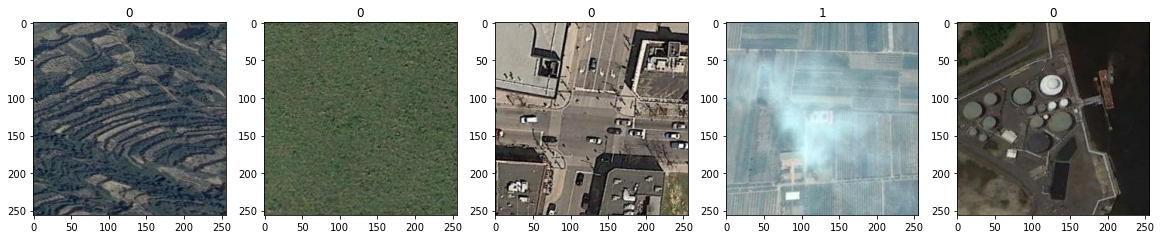

In [107]:
valIm, valCat = filter_proportion(valCat1, valIm1, rat_acept=0.07)

plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5/col+1,col,i+1)
    plt.imshow(valIm[i])
    plt.title(valCat[i])

Ratio cloud images:  0.32967032967032966 %


<ipython-input-108-73ac3b7f443d>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5/col+1,col,i+1)


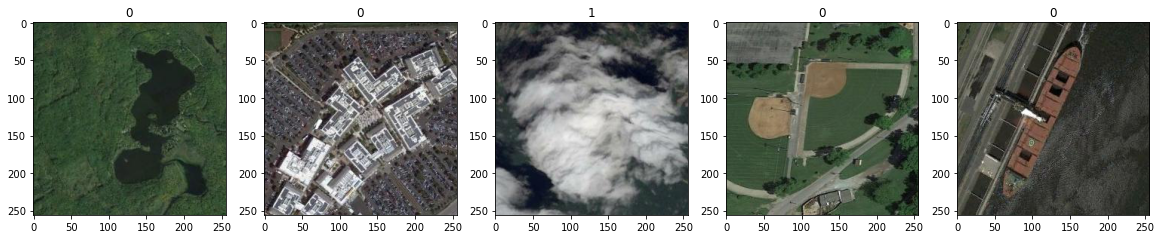

In [108]:
entrIm, entrCat = filter_proportion(entrCat1, entrIm1, rat_acept=0.05)

plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5/col+1,col,i+1)
    plt.imshow(entrIm[i])
    plt.title(entrCat[i])

Ratio cloud images:  0.41843971631205673 %


<ipython-input-109-a98d0e821b64>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5/col+1,col,i+1)


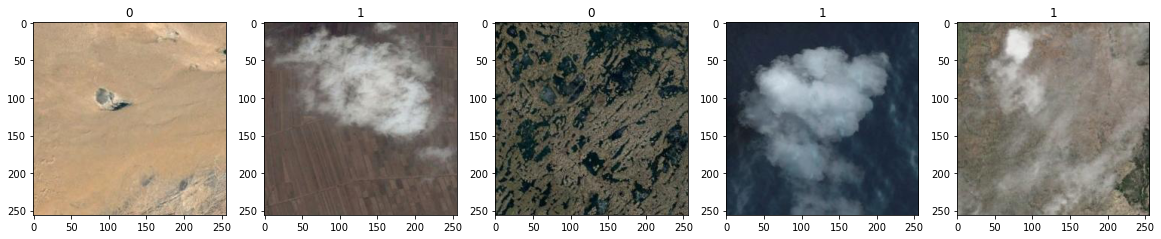

In [109]:
testIm, testCat = filter_proportion(testCat1, testIm1, rat_acept=0.025)

plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5/col+1,col,i+1)
    plt.imshow(testIm[i])
    plt.title(testCat[i])

### 3. Image processing

All images are the same size, so the only step will be to normalize the pixel value in the arrays. This step is necessary for the best performance of the CNN.

In [110]:
valIm = valIm / 255.
entrIm = entrIm / 255.
testIm = testIm / 255.

### 4. Develop the CNN

In [111]:
import keras
from keras import optimizers
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import load_model

Create the CNN structure

In [112]:
modelo2 = Sequential()
modelo2.add(Conv2D(60, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(256,256,3)))
modelo2.add(MaxPooling2D((4, 4)))
modelo2.add(Conv2D(120, (3, 3), activation='relu'))
modelo2.add(MaxPooling2D((2, 2)))
modelo2.add(Dropout(0.5))
modelo2.add(Conv2D(200, (3, 3), activation='relu'))
modelo2.add(MaxPooling2D((2, 2)))
modelo2.add(Conv2D(250, (3, 3), activation='relu'))

modelo2.add(Dropout(0.5))
modelo2.add(Flatten())
modelo2.add(Dense(512, activation='relu')) #relu sería lo normal
modelo2.add(Dense(1,activation='sigmoid'))

In [113]:
modelo2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 60)      1680      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 60)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 62, 62, 120)       64920     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 120)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 120)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 200)       216200    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 200)      

### 5. Training the CNN

In [114]:
modelo2.compile(optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
modelo2a = modelo2.fit(x=entrIm, y=entrCat, batch_size=32, epochs=30, verbose=1, validation_data=(testIm, testCat), shuffle=True)

Epoch 1/30
35/35 [==============================] - 32s 915ms/step - loss: 0.6216 - acc: 0.6832 - val_loss: 0.4592 - val_acc: 0.8298
Epoch 2/30
35/35 [==============================] - 32s 905ms/step - loss: 0.3766 - acc: 0.8379 - val_loss: 0.4717 - val_acc: 0.7908
Epoch 3/30
35/35 [==============================] - 32s 906ms/step - loss: 0.3487 - acc: 0.8480 - val_loss: 0.6572 - val_acc: 0.6348
Epoch 4/30
35/35 [==============================] - 32s 912ms/step - loss: 0.3525 - acc: 0.8452 - val_loss: 0.3670 - val_acc: 0.8262
Epoch 5/30
35/35 [==============================] - 32s 912ms/step - loss: 0.3110 - acc: 0.8727 - val_loss: 0.4350 - val_acc: 0.8050
Epoch 6/30
35/35 [==============================] - 32s 915ms/step - loss: 0.2898 - acc: 0.8755 - val_loss: 0.4308 - val_acc: 0.7979
Epoch 7/30
35/35 [==============================] - 31s 899ms/step - loss: 0.2904 - acc: 0.8764 - val_loss: 0.3612 - val_acc: 0.8369
Epoch 8/30
35/35 [==============================] - 32s 908ms/step - 

save the model

In [115]:
modelo2.save("modF6.h5py")

INFO:tensorflow:Assets written to: modF6.h5py\assets


### 6. CNN Evaluation
Test with validation Dataset

In [116]:
test_eval = modelo2.evaluate(valIm, valCat, verbose=1)
 
print('Validation loss:', test_eval[0])
print('Validation accuracy:', test_eval[1])

27/27 [==============================] - 5s 184ms/step - loss: 0.1323 - acc: 0.9466
Test loss: 0.13231170177459717
Test accuracy: 0.9465737342834473


In order to evaluate the classifier it is necessary to obtain some parameters for the train, test and the validation test. 
Some of this parameters appear in the scream when the CNN is trining:
* **Accurarcy**:  $$\dfrac{Correct Predictions}{Total Images}$$
* **Loss Function**: In this case was binary_crossentropy, computes the cross-entropy loss between true labels and predicted labels. https://keras.io/api/losses/probabilistic_losses/#binary_crossentropy-function
* **Roc curve**: It is a graph wich have in the X axis $$\dfrac{False Clouds}{Total-Free-Clouds-Images}$$ and in the Y axis $$\dfrac{Correct Clouds Prediction}{Total-Clouds-Images}$$
 

Represent how the loss value and acc value change with epoch

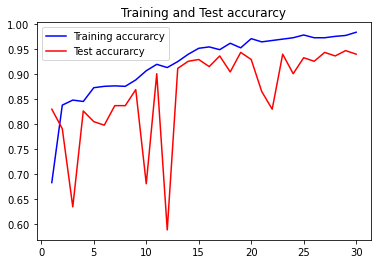

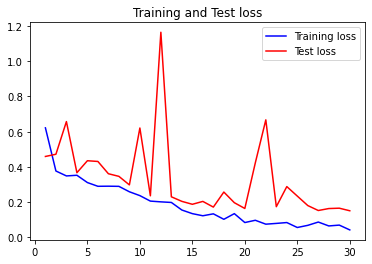

In [117]:
val_loss = modelo2a.history['val_loss'] #loss value
val_acc = modelo2a.history['val_acc'] #acc value
loss = modelo2a.history['loss'] #historical loss array
acc = modelo2a.history['acc'] #historical acc array

X1a1 = range(1, len(acc)+1)
plt.plot(X1a1, acc,'b', label='Training accurarcy')
plt.plot(X1a1, val_acc,'r', label='Test accurarcy')
plt.title('Training and Test accurarcy')
plt.legend()

plt.figure()
plt.plot(X1a1, loss, 'b', label='Training loss')
plt.plot(X1a1, val_loss, 'r',label='Test loss')
plt.title('Training and Test loss')
plt.legend()


plt.show()

### 7. Validation and discussion

The values to loss and acc when the model is tested with the validation dataset was:
* The Test loss: 0.13231170177459717
* Test accuracy: 0.9465737342834473

This is a positive result, more than 94 images out of 100 were correctly classified.

In [118]:
nub_pred = modelo2.predict(valIm, batch_size=32, verbose=1) 
nub_predicted = np.argmax(nub_pred, axis=1)  

27/27 [==============================] - 5s 186ms/step


In [119]:
from sklearn.metrics import roc_curve, roc_auc_score

Calculate the ROC curve values

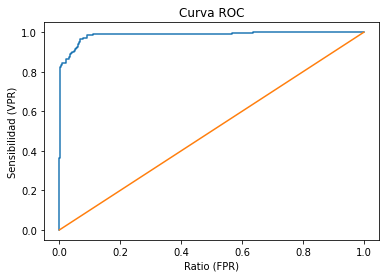

In [120]:
fpr, tpr, thresholds = roc_curve(valCat , nub_pred)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'-')
plt.xlabel('Ratio (FPR)')
plt.ylabel('Sensibilidad (VPR)')
plt.title('Curva ROC')
plt.show()

The area of the curve

In [121]:
AUC=roc_auc_score ( valCat ,  nub_pred) #Area curva roc
print("Area de la curva ROC=",AUC)

Area de la curva ROC= 0.9857533589927956


Again, the result is so positive that the blue line of the ROC curve is close to 1 in the Y axis, which is the maximum possible value. The area of the curve is 0.9857533589927956, a very high and reliable value, the maximum possible value is 1.

Other evaluation values for the CNN. In this model the positive case is when it is an image with a cloud and the negative case is when it is an image without a cloud.

In [122]:
dim = valCat.shape[0]
nv = 0; nf = 0; dv= 0; df = 0; na=0
cn = 0; cd= 0
inf=[]; idf=[]
for i in range(dim):
    if nub_pred[i] >= 0.5 and valCat[i] == 1:
        nv +=1
        cn +=1
    elif nub_pred[i] >= 0.5 and valCat[i] == 0:
        nf +=1
        inf.append(valIm[i])
        cd +=1
    elif nub_pred[i] < 0.5 and valCat[i] == 0:
        dv +=1
        cd +=1
    else :
        df +=1
        idf.append(valIm[i])
        cn +=1
    
print('True Positive TF=',nv)
print('False Positive FP=',nf)
print('True Negative TN=',dv)
print('False Negative FN=',df)
print('Sensitivity VPR=',nv/cn)
print('False positive rate FPR=',nf/cd)
print('Accuracy  ACC=',(nv+dv)/(cn+cd))
print('Specificity SPC=',dv/cd)
print('Positive Predictive Value PPV=',nv/(nv+nf))
print('Negative Predictive Value NPV=',dv/(dv+df))
print('Ratio FDR=',nf/(nf+nv))

True Positive TF= 189
False Positive FP= 13
True Negative TN= 626
False Negative FN= 33
Sensitivity VPR= 0.8513513513513513
False positive rate FPR= 0.02034428794992175
Accuracy  ACC= 0.9465737514518002
Specificity SPC= 0.9796557120500783
Positive Predictive Value PPV= 0.9356435643564357
Negative Predictive Value NPV= 0.9499241274658573
Ratio FDR= 0.06435643564356436


The lowest values that this CNN has is the Sensitivity VPR= 0.85 versus the Specificity SPC= 0.979655717120500783, which means that this CNN is more efficient detecting images without clouds.

Some images that were not correctly predicted

<ipython-input-125-5a4e91d559a1>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5/col+1,col,i+1)


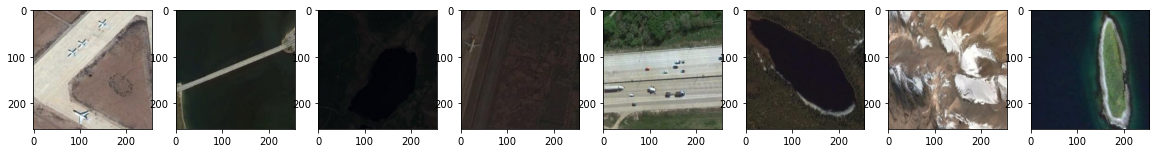

In [125]:
plt.figure(figsize=(20,10))
col = 8
for i in range(col):
    plt.subplot(5/col+1,col,i+1)
    plt.imshow(inf[i])

### 8. References


This project was carried out in 2019, the complete work was published in 2019, it is published in the link: https://www.academia.edu/42824370/Detecci%C3%B3n_de_nubes_en_im%C3%A1genes_adquiridas_con_sat%C3%A9lite_mediante_Redes_Neuronales?source=swp_share

* ¿Qué es una Red Neuronal? Parte 1 : La Neurona. DotCSV. (2018). [Vídeo] 
YouTube.
* ¿Qué es una Red Neuronal? Parte 2 : La Red. DotCSV. (2018). [Vídeo] 
YouTube.
* ¿Qué es una Red Neuronal? Parte 3 : Backpropagation. DotCSV. (2018). 
[Vídeo] YouTube.
* Bagnato, Juan Ignacio (2019). ¿Cómo Funcionan Las Convolutional Neuronal 
Networks? Visión por ordenador. Recuperado el julio de 2019 de: 
https://www.aprendemachinelearning.com/como-funcionan-las-convolutionalneural-networks-vision-por-ordenador/
* Bagnato, Juan Ignacio (2019). Clasificación de imágenes en Python 
Recuperado el julio de 2019 de: 
https://www.aprendemachinelearning.com/clasificacion-de-imagenes-enpython/
* Calvo, Diego (2018). Función de activación – Redes Neuronales. Recuperado 
el agosto de 2019 de: http://www.diegocalvo.es/funcion-de-activacion-redesneuronales/
* Dr. D. Francisco Pascual Romero Chicharro (2019). Machine Learning. Master.
Master en Big Data y Data Science. Material no publicado.
* G. Cheng, J. Han, X. Lu. Remote Sensing Image Scene Classification: Benchmark 
and State of the Art. Proceedings of the IEEE.
* Keras Documentation. Keras FAQ: Frequently Asked Keras Question. . 
Recuperado el julio de 2019 de: https://keras.io/getting-started/faq/#how-can-isave-a-keras-model
* Lopez Briega, Raul (2017). Introducción al Deep Learning. Recuperado el julio 
de 2019 de: https://relopezbriega.github.io/blog/2017/06/13/introduccion-aldeep-learning/
* Odegua, Rising (2018). Image Classification from scratch in keras. Beginner 
friendly, intermediate exciting and expert refreshing. Recuperado el julio de 
2019 de: https://towardsdatascience.com/image-detection-from-scratch-inkeras-f314872006c9
* Ultrera Burgal, Jesús. (2018). Deep Learning básico con keras (Parte 1). 
Recuperado el julio de 2019 de https://enmilocalfunciona.io/deep-learningbasico-con-keras-parte-1/
* Ultrera Burgal, Jesús. (2018). Deep Learning básico con keras (Parte 2): 
Convolutional Nets. Recuperado el julio de 2019 de: 
https://enmilocalfunciona.io/deep-learning-basico-con-keras-parte-2-
convolutional-nets/
* Universidad Internacional de Valencia (2018). Guía Didáctica: Trabajo Fin de 
Master. Master en Big Data y Data Science. Material no publicado.Trabajo Fin de Máster 43
* Willems, Karlijn (2019).Keras Tuorial: Deep Learning in Python. Recuperado el 
julio de 2019 de: https://www.datacamp.com/community/tutorials/deep-learningpython
* Yang, Ji (2017). ReLU and Softmax Activation Function. Recuperado el agosto
de 2019 de: https://github.com/Kulbear/deep-learning-nanofoundation/wiki/ReLU-and-Softmax-Activation-Function